## Handling the Cold Start Problem with Content-Based Filtering

### Import Dependencies

In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Load the Data

In [2]:
movies = pd.read_csv('ml-latest-small/movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


### Data Cleaning and Exploration

In [3]:
movies['genres'] = movies['genres'].apply(lambda x: x.split("|"))
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),[Comedy]


In [4]:
unique_genres = movies["genres"].explode().unique() 
unique_genres

array(['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy',
       'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror',
       'Mystery', 'Sci-Fi', 'War', 'Musical', 'Documentary', 'IMAX',
       'Western', 'Film-Noir', '(no genres listed)'], dtype=object)

In [5]:
movies = movies[movies['genres']!='(no genres listed)']
unique_genres = unique_genres[unique_genres != '(no genres listed)'] 
unique_genres

array(['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy',
       'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror',
       'Mystery', 'Sci-Fi', 'War', 'Musical', 'Documentary', 'IMAX',
       'Western', 'Film-Noir'], dtype=object)

In [6]:
genres_counts_df = pd.DataFrame(movies["genres"].explode().value_counts())\
                    .reset_index().rename(columns={'index': 'genres', 'genres': 'count'})

# Top 10 common genres
genres_counts_df.head(10)

,genres,count
0,Drama,4361
1,Comedy,3756
2,Thriller,1894
3,Action,1828
4,Romance,1596
5,Adventure,1263
6,Crime,1199
7,Sci-Fi,980
8,Horror,978
9,Fantasy,779


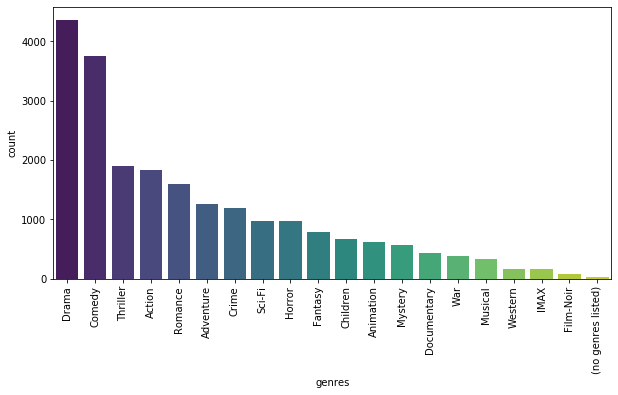

In [7]:
plt.figure(figsize=(10,5))
sns.barplot(x='genres', y='count', data=genres_counts_df, palette='viridis')
plt.xticks(rotation=90)
plt.show()

In [8]:
import re 

def get_year_from_title(title):
    t = title.split(' ')
    year = None
    if re.search(r'\(\d+\)', t[-1]):
        year = t[-1].strip('()')
        year = int(year)
    return year

In [9]:
title = "Toy Story (1995)"
year = get_year_from_title(title)
print(f"Year of release: {year}")
print(type(year))

Year of release: 1995
<class 'int'>


In [10]:
movies['year'] = movies['title'].apply(get_year_from_title)
movies.head()

,movieId,title,genres,year
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995.0
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]",1995.0
2,3,Grumpier Old Men (1995),"[Comedy, Romance]",1995.0
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]",1995.0
4,5,Father of the Bride Part II (1995),[Comedy],1995.0


In [11]:
# Total number of distinct years in the dataset
movies['year'].nunique()

106

In [12]:
# Total number of movies
movies['movieId'].nunique()

9742

In [13]:
# Number of movies with null years
movies['year'].isnull().sum()

24

In [14]:
# Total number of movies after removing null years
movies = movies[~movies['year'].isnull()]
movies['movieId'].nunique()

9718

In [15]:
def get_decade(year):
    return year - (year%10)

In [16]:
movies = movies.copy()
movies['decade'] = movies['year'].apply(get_decade)
movies.head()

,movieId,title,genres,year,decade
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995.0,1990.0
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]",1995.0,1990.0
2,3,Grumpier Old Men (1995),"[Comedy, Romance]",1995.0,1990.0
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]",1995.0,1990.0
4,5,Father of the Bride Part II (1995),[Comedy],1995.0,1990.0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

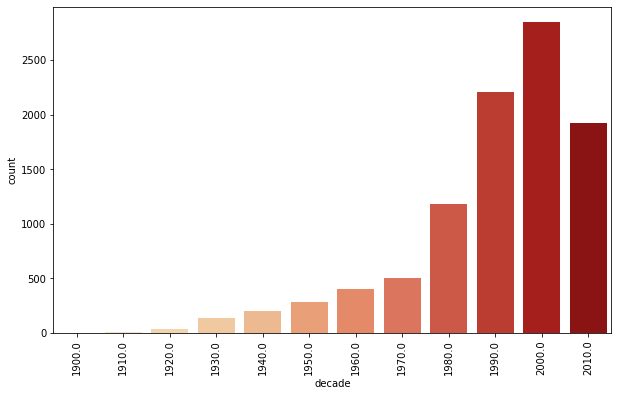

In [17]:
plt.figure(figsize=(10,6))
sns.countplot(movies['decade'], palette='OrRd')
plt.xticks(rotation=90)

In [18]:
def combine_features(row):
    return ' '.join(row['genres']) + " " + str(row['decade']) 

In [19]:
movies["combined_features"] = movies.apply(combine_features, axis=1)
movies.head()

,movieId,title,genres,year,decade,combined_features
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995.0,1990.0,Adventure Animation Children Comedy Fantasy 19...
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]",1995.0,1990.0,Adventure Children Fantasy 1990.0
2,3,Grumpier Old Men (1995),"[Comedy, Romance]",1995.0,1990.0,Comedy Romance 1990.0
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]",1995.0,1990.0,Comedy Drama Romance 1990.0
4,5,Father of the Bride Part II (1995),[Comedy],1995.0,1990.0,Comedy 1990.0


### Transforming the Data

In [20]:
# CountVectorizer() class represent texts as vectors
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
count_matrix = cv.fit_transform(movies["combined_features"])

### Building a "Similar Movies" Recommender Using Cosine Similarity

In [21]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_scores = cosine_similarity(count_matrix)
print(similarity_scores)

[[1.         0.81649658 0.47140452 ... 0.         0.23570226 0.57735027]
 [0.81649658 1.         0.28867513 ... 0.         0.         0.35355339]
 [0.47140452 0.28867513 1.         ... 0.         0.         0.81649658]
 ...
 [0.         0.         0.         ... 1.         0.40824829 0.        ]
 [0.23570226 0.         0.         ... 0.40824829 1.         0.        ]
 [0.57735027 0.35355339 0.81649658 ... 0.         0.         1.        ]]


In [22]:
def get_title_from_index(index):
    return movies[movies.index == index]["title"].values[0]

def get_index_from_title(title):
    return movies[movies.title == title].index.values.astype(int)[0]

In [23]:
def movie_finder(title):
    all_titles = movies['title'].tolist()
    closest_match = list(filter(lambda x: title.lower() in x.lower(), all_titles))
    return closest_match[0]

In [24]:
title = movie_finder('jumanji')
title

'Jumanji (1995)'

In [25]:
def get_content_based_recommendations(title, n_recommendations=5):
    
    movie_index = get_index_from_title(movie_finder(title))
    sim_scores = list(enumerate(similarity_scores[movie_index]))
    sorted_similar_movies = sorted(sim_scores,key=lambda x:x[1],reverse=True)[1:(n_recommendations+1)]
    
    similar_movies = [i[0] for i in sorted_similar_movies]
    recommended_movies = movies['title'].iloc[similar_movies].values
    
    print(f"Recommendations for {title}:")
    for i in range(len(recommended_movies)): 
        print (recommended_movies[i])

In [26]:
get_content_based_recommendations('avatar', 10)

Recommendations for avatar:
Mulan II (2004)
Chicken Run (2000)
Rugrats in Paris: The Movie (2000)
Jonah: A VeggieTales Movie (2002)
Eight Crazy Nights (Adam Sandler's Eight Crazy Nights) (2002)
Garfield: The Movie (2004)
Shark Tale (2004)
Hoodwinked! (2005)
Cars (2006)
Garfield: A Tail of Two Kitties (2006)
